<a href="https://colab.research.google.com/github/1zulkifel/Boston_house/blob/master/Boston_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

**Boston Housing** It has relatively few data points: only 506, split
between 404 training samples and 102 test samples. And each feature in the input data
(for example, the crime rate) has a different scale. For instance, some values are pro-
portions, which take values between 0 and 1; others take values between 1 and 12, oth-
ers between 0 and 100, and so on.

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models,layers,utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [4]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [5]:
train_targets#The targets are the median values of owner-occupied homes, in thousands of dollars:

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

**Normalizing Data** Note that the quantities used for normalizing the test data are computed using the
training data. You should never use in your workflow any quantity computed on the
test data, even for something as simple as data normalization.

In [6]:
mean=train_data.mean(axis=0)
train_data-=mean
std = train_data.std(axis=0)
train_data/=std
test_data-=mean
test_data/=std

**K-fold Crosss validation** is used when you have small anout of data for training a model. it divides the data into two patches (train_data, and test data)

**Building Model**

In [7]:
def build_model():
  model=models.Sequential()
  model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

In [19]:
k=4
num_all_sample=len(train_data)//4
num_epochs=500
all_score=[]
all_mae_histories=[]
for i in range (k):
  print('processing fold#',i)
  val_data=train_data[i*num_all_sample:(i+1)*num_all_sample]
  val_target=train_targets[i*num_all_sample:(i+1)*num_all_sample]
  partial_train_data=np.concatenate([train_data[:i * num_all_sample], train_data[(i + 1) * num_all_sample:]],axis=0)
  partial_train_target=np.concatenate([train_targets[:i*num_all_sample],train_targets[(i+1)*num_all_sample:]],axis=0)
  model=build_model()
  history=model.fit(partial_train_data,partial_train_target,epochs=num_epochs,batch_size=1,verbose=0)
  val_mse,val_mae=model.evaluate(val_data,val_target,verbose=0)
  all_score.append(val_mae)
  mae_history= history.history['mae']
  all_mae_histories.append(mae_history)



processing fold# 0
processing fold# 1
processing fold# 2
processing fold# 3


In [20]:
average_mae_history=[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print('all fold validation error',all_score)
print('mean for all fold validation error',np.mean(all_score))
print('average mae history',average_mae_history)


all fold validation error [2.229228973388672, 3.0164668560028076, 2.6847546100616455, 2.8366944789886475]
mean for all fold validation error 2.691786229610443
average mae history [10.679481506347656, 3.739004969596863, 3.0541818141937256, 2.750121295452118, 2.591971278190613, 2.4795608520507812, 2.4076035022735596, 2.3518697023391724, 2.3212562799453735, 2.246147334575653, 2.228050410747528, 2.175846040248871, 2.170683741569519, 2.1298664808273315, 2.117597818374634, 2.0909881591796875, 2.0559841692447662, 2.047109842300415, 2.0170585215091705, 1.9815260767936707, 1.9648802280426025, 1.9407477676868439, 1.960963398218155, 1.9018489718437195, 1.9162464141845703, 1.9006427526474, 1.8693756759166718, 1.8464920818805695, 1.8358204662799835, 1.8164829909801483, 1.822375327348709, 1.818822979927063, 1.7806197702884674, 1.7415566146373749, 1.7556685507297516, 1.7705610394477844, 1.702731966972351, 1.6925338804721832, 1.706660807132721, 1.7187865376472473, 1.674377828836441, 1.6746754348278046

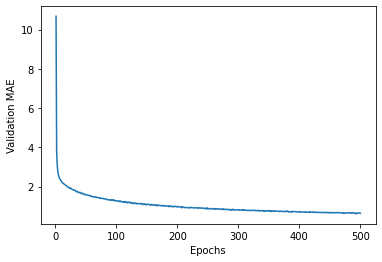

In [21]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

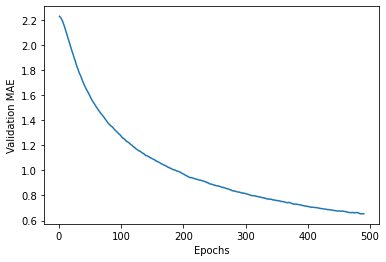

In [22]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
        smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()